In [20]:
import numpy as np
import pandas as pd
from random import seed
from random import randrange
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, recall_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import scikitplot as skplt
dataset = np.load(r'C:\Users\Justin\Desktop\Unizeug\Abgeschlossen\PBL\uniprot_binary_binding_2.5.npz', mmap_mode='r')
labels = np.genfromtxt(fname = r'C:\Users\Justin\Desktop\Unizeug\Abgeschlossen\PBL\binary_binding_2.5(1).txt',dtype='str')


aminoacids = []      

for protein in dataset:
    amino = dataset[str(protein)]
    aminoacids.append([protein, amino])

aminoacids.sort()           #alphabetisch sortieren


In [21]:
newLabels = [] 

for protein, label in labels:                     #labels zahl zuweisen und multilabels rauskürzen
    if (label == 'small'):
        newLabels.append([protein, 0])
    elif (label == 'metal'):
        newLabels.append([protein, 1])
    elif (label == 'nuc'):
        newLabels.append([protein, 2])          #small = 514,metal = 317, nuc = 86   #+428 nuc & + 197 metal = +625

filteredAmino = []                     #Schnittmenge
filteredLabels = []                    #filteredLabels = newLabels

for amino in aminoacids:
    for label in newLabels:
        if (amino[0] == label[0]):
            filteredAmino.append(amino[1])
            filteredLabels.append(label[1])            #proteinId's raus
            break

 

                                                     #b = [[seqvec1][seqvec2]] 1119 x 1024 und l = 1119 [1,2,...] len(l) = 1119
                                                     #b.shape = (m,n)and  l.shape should be (m)
print(filteredAmino)
print(filteredLabels)
a = (np.array(filteredAmino))
b = (np.array(filteredLabels))
print(a.shape)
print(b.shape)
print(sorted(Counter(b).items()))

[array([-0.06119468, -0.06705828, -0.02353014, ..., -0.01998541,
       -0.01302928,  0.00305886], dtype=float32), array([-0.01073384, -0.05777837, -0.02107071, ..., -0.02772963,
       -0.03417914,  0.02486949], dtype=float32), array([ 0.09605373,  0.09556994, -0.04512826, ..., -0.0167642 ,
       -0.08362756,  0.04360565], dtype=float32), array([-0.08990984,  0.01318069, -0.11939176, ..., -0.21569516,
       -0.05071307,  0.15374964], dtype=float32), array([-0.0891384 , -0.04641613,  0.03162954, ..., -0.04845039,
        0.01265086,  0.05885272], dtype=float32), array([ 0.11167399, -0.00945954,  0.0652216 , ..., -0.06064047,
        0.03214058, -0.02042388], dtype=float32), array([-0.10749184,  0.10484402, -0.04252666, ..., -0.06960949,
        0.03524953,  0.03907198], dtype=float32), array([ 0.12456828, -0.04668752,  0.0659027 , ..., -0.04693725,
        0.02970962,  0.04184511], dtype=float32), array([ 0.09497003,  0.05987024, -0.02054984, ...,  0.09791085,
       -0.03094697,  0.

In [22]:
a_train, a_test, b_train, b_test = train_test_split(a, b, random_state = 0, test_size = 0.1)
print(a_train)
print(b_train)
print(b_test)
print(a_test)                      #test absplitten -> training set nehmen zum weiterarbeiten und zum undersampling
print("Dataset sizes:\nWhole set: {}\nTraining Set: {}\nTest Set: {}".
      format(len(b), len(b_train), len(b_test)))
print(sorted(Counter(b_train).items()))

[[ 0.00487354 -0.04650008 -0.13846247 ...  0.05946865 -0.00651842
   0.0507807 ]
 [-0.12904783  0.008019   -0.04364731 ... -0.06823428  0.00508952
   0.12247737]
 [ 0.05552622  0.1005061  -0.00595048 ...  0.02436711 -0.04990532
   0.06412216]
 ...
 [-0.01583298 -0.00647885  0.0256163  ... -0.01601427  0.01366854
   0.05757654]
 [-0.02997739  0.01738001  0.03785298 ... -0.05050654  0.02565693
   0.00428841]
 [-0.0717525  -0.09129557 -0.07935484 ... -0.05195163  0.07309202
   0.16534369]]
[0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 2 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1
 1 0 1 0 2 0 1 0 0 1 0 0 1 1 0 1 2 0 2 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 2 0 0
 2 0 0 2 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 2 0 0 0 1 0 0 0 0 0 2 2
 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 2 1 1 1 1 0 1 1 0 1 0 2 1 2 1
 0 0 0 1 1 0 0 0 1 1 1 1 2 1 0 0 0 0 0 2 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 2 2
 0 1 0 0 2 1 2 2 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0

In [23]:
clf = DummyClassifier(strategy='stratified', random_state=0)        #stratified/most_frequent/uniform
clf.fit(a_test, b_test)

clf.score(a_test, b_test)

0.5434782608695652

In [24]:
# RANDOMOVERSAMPLER AND MAKE_CLASSIFICATION

    # a_train,b_train = make_classification(n_samples=1359, n_features=3, n_informative=3,     #fix the imbalance
                          # n_redundant=0, n_repeated=0, n_classes=3,                   #überarbeiten
                          # n_clusters_per_class=1,
                          # weights=[0, 0, 0],
                          # class_sep=0.8, random_state=0)
#oser = SMOTE(ration ={0: 453, 1: 292, 2:80}, random state = 0)             #SMOTE maybe doesnt overfit
#a_rs, b _rs = sampler.fit(a_train,b_train)
#print('SMOTE {}'.format(Counter(b_train)))
#ros = RandomOverSampler(random_state=0)                                       #ros known for occuring overfitting
#a_train_resampled, b_train_resampled = ros.fit_resample(a_train,b_train)
#print(sorted(Counter(b_train_resampled).items()))

In [25]:
cv = StratifiedKFold(n_splits = 5)
classifier = MLPClassifier(early_stopping = True)

print(format(sum(b_train==1)))
print(format(sum(b_train==0)))
print(format(sum(b_train==2)))

sm = SMOTE(random_state = 0)
a_train_res, b_train_res = sm.fit_sample(a_train, b_train.ravel())
print(format(a_train_res.shape))
print(format(b_train_res.shape))
print(format(sum(b_train_res==1)))
print(format(sum(b_train_res==0)))
print(format(sum(b_train_res==2)))

params ={ 'hidden_layer_sizes': [(30,)]} #testing different parameters #max_iter maybe?

grid = GridSearchCV(estimator = classifier, cv = cv, param_grid = params,  
                    return_train_score=True)
grid.fit(a_train_res, b_train_res)
#grid.fit(a_test,b_test)



cv_results = pd.DataFrame(grid.cv_results_)
print(cv_results)


292
453
80
(1359, 1024)
(1359,)
453
453
453
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.815135      0.199873         0.002199          0.0004   

  param_hidden_layer_sizes                         params  split0_test_score  \
0                    (30,)  {'hidden_layer_sizes': (30,)}           0.776557   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.754579           0.776557           0.796296  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.774834        0.013382                1            0.898711   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.870166            0.941068            0.839302   

   split4_train_score  mean_train_score  std_train_score  
0            0.852158          0.880281         0.036352  

[1 rows x 21 columns]


In [26]:
best_classifier = grid.best_estimator_
b_pred = best_classifier.predict(a_test)
pred_score = best_classifier.score(a_test, b_test)

# Calculate confusion matrix (showing tp, fp, tn, fn)   
cm = confusion_matrix(b_test, b_pred)
cmn = (cm.T / cm.astype(np.float).sum(axis=1)).T
print(cmn)
print('Acc: {}'.format(round(pred_score, 3)))#TP + TN / n
#precision_score(b_train_res, b_pred, average='macro')




[[0.70491803 0.24590164 0.04918033]
 [0.24       0.76       0.        ]
 [0.16666667 0.16666667 0.66666667]]
Acc: 0.717


In [27]:
f1_score(b_test, b_pred, average='macro')

0.6744975744975744

In [19]:
#training set prediction
print(classification_report(b_train_res, b_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1359, 92]

In [15]:
print(classification_report(b_test,b_pred)) #test set prediction

              precision    recall  f1-score   support

           0       0.80      0.54      0.65        61
           1       0.40      0.68      0.50        25
           2       0.50      0.67      0.57         6

    accuracy                           0.59        92
   macro avg       0.57      0.63      0.57        92
weighted avg       0.67      0.59      0.60        92



In [16]:
#Random prediction on same set as mine

bb_pred = clf.predict(a_train_res)
pred_score = best_classifier.score(a_train_res, b_train_res)
print(classification_report(b_train_res, bb_pred))

              precision    recall  f1-score   support

           0       0.33      0.64      0.43       453
           1       0.32      0.26      0.29       453
           2       0.39      0.09      0.14       453

    accuracy                           0.33      1359
   macro avg       0.34      0.33      0.29      1359
weighted avg       0.34      0.33      0.29      1359



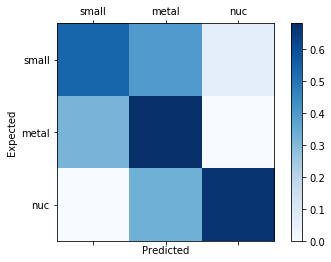

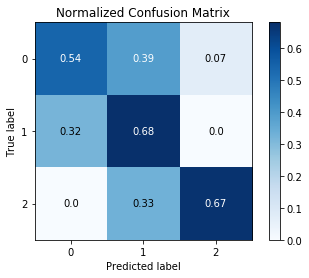

In [12]:
labels = ['small', 'metal', 'nuc']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmn, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
skplt.metrics.plot_confusion_matrix(b_test, b_pred, normalize=True)
plt.show()
plt.show()
